<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 4:</span> Cluster Analysis</h1>
<hr>

Welcome to <span style="color:royalblue">Module 4: Cluster Analysis</span>!

At last, it's time to build our clustering models!


For clustering problems, the chosen input features are usually more important than which algorithm you use.
* In this module, we'll apply the K-Means algorithm to 3 different feature sets.
* There are no clear, widely-accepted performance metrics for clusters because there're no "ground truth" labels.
* Even so, we can compare the different clusters created from the 3 different feature sets.

<br><hr id="toc">

### In this module...

In this module, we'll cover:
1. [K-Means](#k-means)
2. [Base features](#base)
3. [Threshold features](#threshold)
4. [PCA features](#pca)
5. [Model comparison](#comparison)


<br><hr>

### First, let's import libraries and load the datasets.

First, import libraries that you'll need.

In [1]:
# print_function for compatibility with Python 3
from __future__ import print_function

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

# Scikit-Learn's make_pipeline function
from sklearn.pipeline import make_pipeline

# Scikit-Learn's StandardScaler
from sklearn.preprocessing import StandardScaler 

# Scikit-Learn's KMeans algorithm (added later)
from sklearn.cluster import KMeans


**Next, let's import 3 CSV files we've saved throughout this project.**
* Let's import <code style="color:crimson">'analytical_base_table.csv'</code> (created in Module 1) as <code style="color:steelblue">base_df</code>. 
* Let's import <code style="color:crimson">'threshold_item_data.csv'</code> (created in Module 2) as <code style="color:steelblue">threshold_item_data</code>. 
* Let's import <code style="color:crimson">'pca_item_data.csv'</code> (created in Module 3) as <code style="color:steelblue">pca_item_data</code>. 
* Set <code style="color:steelblue">index_col=0</code> for each one to use CustomerID as the index.

In [40]:
# Import analytical base table
base_df = pd.read_csv('project_files/analytical_base_table.csv', index_col=0)

# Import thresholded item features
threshold_item_data = pd.read_csv('threshold_item_data.csv', index_col=0)

# Import PCA item features
pca_item_data = pd.read_csv('pca_item_data.csv', index_col=0)


**Print the shape of each one to make sure we're on the same page.**

In [42]:
# Print shape of each dataframe
print(base_df.shape)
print(threshold_item_data.shape)
print(pca_item_data.shape)

(414, 8)
(414, 20)
(414, 125)


<span id="k-means"></span>
# 1. K-Means

For clustering, which algorithm you choose is typically less important than the **input features** that you feed into it. 

<br>
**We already have a <code style="color:steelblue">base_df</code>.** 

**Create a <code style="color:steelblue">threshold_df</code> by joining it with <code style="color:steelblue">threshold_item_data</code>.**
* Then, display the first 5 rows of the new dataframe.

In [36]:
# Join base_df with threshold_item_data
threshold_df = base_df.join(threshold_item_data)

# Display first 5 rows of threshold_df
threshold_df.head()

('InvoiceNo', 'total_transactions')  total_products  \
CustomerID                                                        
12347                                         7             182   
12348                                         4              31   
12349                                         1              73   
12350                                         1              17   
12352                                         8              85   

            total_unique_products  total_sales  avg_product_value  \
CustomerID                                                          
12347                         103      4310.00          23.681319   
12348                          22      1797.24          57.975484   
12349                          73      1757.55          24.076027   
12350                          17       334.40          19.670588   
12352                          59      2506.04          29.482824   

            avg_cart_value  min_cart_value  max_cart_value  22961  22630  \
CustomerID                                                                 
12347           615.714286          224.82         1294.32      0      0   
12348           449.310000          227.44          892.80      0      0   
12349          1757.550000         1757.55         1757.55      0      0   
12350           334.400000          334.40          334.40      0      0   
12352           313.255000          120.33          840.30      0      1   

            22139  21080  85099B  20726  20719  20750  23084  20725  21212  \
CustomerID                                                                   
12347           0      0       0      0      4      0      3      0      0   
12348           0      0       0      0      0      0      0      0      0   
12349           0      0       0      0      0      0      0      0      0   
12350           0      0       0      0      0      0      0      0      0   
12352           0      0       0      0      0      0      0      0      0   

            22551  22629  22328  21731  22556  22554  22423  22326  POST  
CustomerID                                                                
12347           0      0      0      5      0      0      4      0     0  
12348           0      0      0      0      0      0      0      0     4  
12349           0      0      0      0      1      1      1      1     1  
12350           1      0      0      0      0      0      0      0     1  
12352           0      0      0      1      0      0      2      0     5

**Create a <code style="color:steelblue">pca_df</code> by joining <code style="color:steelblue">base_df</code> with <code style="color:steelblue">pca_item_data</code>.**
* Then, display the first 5 rows of the new dataframe.

In [43]:
# Join base_df with pca_item_data
pca_df = base_df.join(pca_item_data)

# Display first 5 rows of pca_df
pca_df.head()

('InvoiceNo', 'total_transactions')  total_products  \
CustomerID                                                        
12347                                         7             182   
12348                                         4              31   
12349                                         1              73   
12350                                         1              17   
12352                                         8              85   

            total_unique_products  total_sales  avg_product_value  \
CustomerID                                                          
12347                         103      4310.00          23.681319   
12348                          22      1797.24          57.975484   
12349                          73      1757.55          24.076027   
12350                          17       334.40          19.670588   
12352                          59      2506.04          29.482824   

            avg_cart_value  min_cart_value  max_cart_value       PC1  \
CustomerID                                                             
12347           615.714286          224.82         1294.32  5.876139   
12348           449.310000          227.44          892.80 -4.219841   
12349          1757.550000         1757.55         1757.55 -1.260861   
12350           334.400000          334.40          334.40 -4.929321   
12352           313.255000          120.33          840.30 -2.053109   

                 PC2       PC3       PC4       PC5        PC6       PC7  \
CustomerID                                                                
12347       4.828933 -0.495551  3.093848 -0.633727 -11.534080  2.161805   
12348       1.226167 -1.881884 -0.174398  0.818134   1.160917 -0.871339   
12349       2.387630 -0.073082 -1.119451 -0.033960  -3.714493 -0.343741   
12350      -0.714852 -1.580904 -0.469799 -0.116280   0.647710  0.113214   
12352       2.110937  0.184796  0.128558  0.087657  -1.943508  2.384640   

                 PC8       PC9      PC10      PC11      PC12       PC13  \
CustomerID                                                                
12347       7.117020  5.336039  4.424626  4.636781  2.316493  12.310501   
12348      -0.846775  0.460095  0.853765 -0.400662  0.981580  -1.103585   
12349      -0.148784 -0.788747 -0.379739  1.568221  0.184463   0.223868   
12350      -1.336310  1.547032 -1.190402 -0.213223  1.057021  -0.474954   
12352       0.898804 -0.672219  0.082790  0.877583  1.052280  -0.740880   

                PC14       PC15      PC16      PC17      PC18       PC19  \
CustomerID                                                                 
12347       1.987126 -11.430947  5.617400 -2.177414  7.665749 -12.135181   
12348       0.769865  -0.093262 -0.312199 -0.447828  1.207506   0.380111   
12349      -0.050728   3.180679 -0.511702 -1.838378  0.382143   0.318426   
12350       0.856487  -1.305576  0.243330  0.268630  1.952144  -0.227880   
12352      -2.072485  -0.638677  0.015154  0.115037  0.576670  -0.031948   

                 PC20      PC21      PC22       PC23       PC24       PC25  \
CustomerID                                                                   
12347      -16.048848 -5.949340  7.814847  40.519714 -35.573777 -17.556312   
12348       -0.469528  0.185512  0.051400   0.496261   0.371631   1.224350   
12349       -0.003104 -0.418798  0.456987  -0.787598   1.754168  -1.477693   
12350        0.570597 -0.186068  0.902662   1.363566   0.176107  -0.261192   
12352        0.103401 -0.697938 -0.912560  -2.330018   0.518951  -1.762487   

                PC26       PC27      PC28       PC29       PC30      PC31  \
CustomerID                                                                  
12347       6.867821  20.887369  2.297425 -26.158967 -32.580534  7.888821   
12348      -0.769620  -0.273204  0.850413  -0.375991  -0.573712  1.007457   
12349       0.759631  -0.906569  0.762072   0.501358  -1.349196  0.285866   
12350      -0.165427  -0.678410  1.0

**Before moving on, add this import to your library imports above. Then, re-run that code cell.**

<pre style="color:steelblue">
from sklearn.cluster import KMeans
</pre>

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="base"></span>
# 2. Base DF

The first set of features we'll consider is **"Base DF"**. 
* This only includes the purchase pattern features from our analytical base table.

<br>
**First, display the first 5 observations from <code style="color:steelblue">base_df</code> just as reminder.**

In [9]:
# First 5 observations of base_df
base_df.head()

('InvoiceNo', 'total_transactions')  total_products  \
CustomerID                                                        
12347                                         7             182   
12348                                         4              31   
12349                                         1              73   
12350                                         1              17   
12352                                         8              85   

            total_unique_products  total_sales  avg_product_value  \
CustomerID                                                          
12347                         103      4310.00          23.681319   
12348                          22      1797.24          57.975484   
12349                          73      1757.55          24.076027   
12350                          17       334.40          19.670588   
12352                          59      2506.04          29.482824   

            avg_cart_value  min_cart_value  max_cart_value  
CustomerID                                                  
12347           615.714286          224.82         1294.32  
12348           449.310000          227.44          892.80  
12349          1757.550000         1757.55         1757.55  
12350           334.400000          334.40          334.40  
12352           313.255000          120.33          840.30

**Let's initialize a model pipeline for K-Means.**
* Note that we can control the number of clusters using <code style="color:steelblue">n_clusters=3</code>. This is the hyperparameter $k$.
* We also set <code style="color:steelblue">random_state=123</code> for replicable results. 

In [10]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

**Once we have the pipeline, fitting the model is just 1 line of code.**

In [52]:
# Fit K-Means pipeline
k_means.fit(base_df)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

**Let's save the clusters to our dataframe.**

In [53]:
# Save clusters to base_df
base_df['cluster'] = k_means.predict(base_df)

# Display first 5 rows of base_df
base_df.head()

/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


('InvoiceNo', 'total_transactions')  total_products  \
CustomerID                                                        
12347                                         7             182   
12348                                         4              31   
12349                                         1              73   
12350                                         1              17   
12352                                         8              85   

            total_unique_products  total_sales  avg_product_value  \
CustomerID                                                          
12347                         103      4310.00          23.681319   
12348                          22      1797.24          57.975484   
12349                          73      1757.55          24.076027   
12350                          17       334.40          19.670588   
12352                          59      2506.04          29.482824   

            avg_cart_value  min_cart_value  max_cart_value  cluster  
CustomerID                                                           
12347           615.714286          224.82         1294.32        1  
12348           449.310000          227.44          892.80        0  
12349          1757.550000         1757.55         1757.55        0  
12350           334.400000          334.40          334.40        0  
12352           313.255000          120.33          840.30        0

**To visualize these clusters, we can plot a scatterplot and color the points by cluster.**
* Since it's impossible to visualize all of the features, we'll just pick 2.
* We use the <code style="color:steelblue">hue=</code> argument to color by cluster.

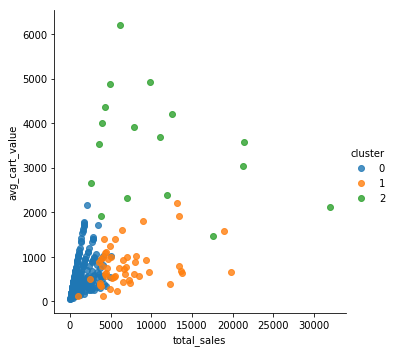

In [22]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=base_df, fit_reg=False)

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="threshold"></span>
# 3. Threshold DF

The second set of features we'll consider is **"Threshold DF"**. 
* This includes the purchase pattern features from our analytical base table.
* This also includes the purchase counts for the 20 most popular items.

We'll repeat the same steps as above.

<br>
**First, initialize a new model pipeline for K-Means.**
* Set it to create 3 clusters.
* Also set <code style="color:steelblue">random_state=123</code> for replicable results. 

In [54]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123)) 

**Next, fit the K-Means model pipeline to <code style="color:steelblue">threshold_df</code>.**

In [55]:
# Fit K-Means pipeline
k_means.fit(threshold_df)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

**Save the clusters to <code style="color:steelblue">threshold_df</code>.**

In [56]:
# Save clusters to threshold_df
threshold_df['cluster'] = k_means.predict(threshold_df)

# Display first 5 rows of threshold_df
threshold_df.head()

/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


('InvoiceNo', 'total_transactions')  total_products  \
CustomerID                                                        
12347                                         7             182   
12348                                         4              31   
12349                                         1              73   
12350                                         1              17   
12352                                         8              85   

            total_unique_products  total_sales  avg_product_value  \
CustomerID                                                          
12347                         103      4310.00          23.681319   
12348                          22      1797.24          57.975484   
12349                          73      1757.55          24.076027   
12350                          17       334.40          19.670588   
12352                          59      2506.04          29.482824   

            avg_cart_value  min_cart_value  max_cart_value  22961  22630  \
CustomerID                                                                 
12347           615.714286          224.82         1294.32      0      0   
12348           449.310000          227.44          892.80      0      0   
12349          1757.550000         1757.55         1757.55      0      0   
12350           334.400000          334.40          334.40      0      0   
12352           313.255000          120.33          840.30      0      1   

            22139  21080  85099B  20726  20719  20750  23084  20725  21212  \
CustomerID                                                                   
12347           0      0       0      0      4      0      3      0      0   
12348           0      0       0      0      0      0      0      0      0   
12349           0      0       0      0      0      0      0      0      0   
12350           0      0       0      0      0      0      0      0      0   
12352           0      0       0      0      0      0      0      0      0   

            22551  22629  22328  21731  22556  22554  22423  22326  POST  \
CustomerID                                                                 
12347           0      0      0      5      0      0      4      0     0   
12348           0      0      0      0      0      0      0      0     4   
12349           0      0      0      0      1      1      1      1     1   
12350           1      0      0      0      0      0      0      0     1   
12352           0      0      0      1      0      0      2      0     5   

            cluster  
CustomerID           
12347             0  
12348             2  
12349             2  
12350             2  
12352             2

If you scroll to the right, you'll see the assigned clusters.

<br>
**To visualize these clusters, plot a scatterplot and color the points by cluster.**
* Use the same 2 features as in the scatterplot above so that you can visually contrast the plots.
* Use the <code style="color:steelblue">hue=</code> argument to color by cluster.

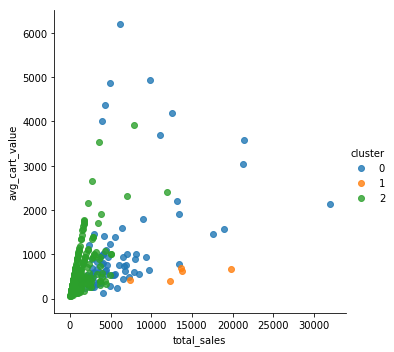

In [57]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=threshold_df, fit_reg=False)

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="pca"></span>
# 4. PCA DF

The last set of features we'll consider is **"PCA DF"**. 
* This includes the purchase pattern features from our analytical base table.
* This also includes the first 125 principal component features from the item data.

We'll repeat the same steps as above.

<br>

**First, initialize a new model pipeline for K-Means.**
* Set it to create 3 clusters.
* Also set <code style="color:steelblue">random_state=123</code> for replicable results. 

In [63]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

**Next, fit the K-Means model pipeline to <code style="color:steelblue">pca_df</code>.**

In [64]:
# Fit K-Means pipeline
k_means.fit(pca_df)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

**Save the clusters to <code style="color:steelblue">pca_df</code>.**

In [65]:
# Save clusters to pca_df
pca_df['cluster'] = k_means.predict(pca_df)

# Display first 5 rows of pca_df
pca_df.head()

/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


('InvoiceNo', 'total_transactions')  total_products  \
CustomerID                                                        
12347                                         7             182   
12348                                         4              31   
12349                                         1              73   
12350                                         1              17   
12352                                         8              85   

            total_unique_products  total_sales  avg_product_value  \
CustomerID                                                          
12347                         103      4310.00          23.681319   
12348                          22      1797.24          57.975484   
12349                          73      1757.55          24.076027   
12350                          17       334.40          19.670588   
12352                          59      2506.04          29.482824   

            avg_cart_value  min_cart_value  max_cart_value       PC1  \
CustomerID                                                             
12347           615.714286          224.82         1294.32  5.876139   
12348           449.310000          227.44          892.80 -4.219841   
12349          1757.550000         1757.55         1757.55 -1.260861   
12350           334.400000          334.40          334.40 -4.929321   
12352           313.255000          120.33          840.30 -2.053109   

                 PC2       PC3       PC4       PC5        PC6       PC7  \
CustomerID                                                                
12347       4.828933 -0.495551  3.093848 -0.633727 -11.534080  2.161805   
12348       1.226167 -1.881884 -0.174398  0.818134   1.160917 -0.871339   
12349       2.387630 -0.073082 -1.119451 -0.033960  -3.714493 -0.343741   
12350      -0.714852 -1.580904 -0.469799 -0.116280   0.647710  0.113214   
12352       2.110937  0.184796  0.128558  0.087657  -1.943508  2.384640   

                 PC8       PC9      PC10      PC11      PC12       PC13  \
CustomerID                                                                
12347       7.117020  5.336039  4.424626  4.636781  2.316493  12.310501   
12348      -0.846775  0.460095  0.853765 -0.400662  0.981580  -1.103585   
12349      -0.148784 -0.788747 -0.379739  1.568221  0.184463   0.223868   
12350      -1.336310  1.547032 -1.190402 -0.213223  1.057021  -0.474954   
12352       0.898804 -0.672219  0.082790  0.877583  1.052280  -0.740880   

                PC14       PC15      PC16      PC17      PC18       PC19  \
CustomerID                                                                 
12347       1.987126 -11.430947  5.617400 -2.177414  7.665749 -12.135181   
12348       0.769865  -0.093262 -0.312199 -0.447828  1.207506   0.380111   
12349      -0.050728   3.180679 -0.511702 -1.838378  0.382143   0.318426   
12350       0.856487  -1.305576  0.243330  0.268630  1.952144  -0.227880   
12352      -2.072485  -0.638677  0.015154  0.115037  0.576670  -0.031948   

                 PC20      PC21      PC22       PC23       PC24       PC25  \
CustomerID                                                                   
12347      -16.048848 -5.949340  7.814847  40.519714 -35.573777 -17.556312   
12348       -0.469528  0.185512  0.051400   0.496261   0.371631   1.224350   
12349       -0.003104 -0.418798  0.456987  -0.787598   1.754168  -1.477693   
12350        0.570597 -0.186068  0.902662   1.363566   0.176107  -0.261192   
12352        0.103401 -0.697938 -0.912560  -2.330018   0.518951  -1.762487   

                PC26       PC27      PC28       PC29       PC30      PC31  \
CustomerID                                                                  
12347       6.867821  20.887369  2.297425 -26.158967 -32.580534  7.888821   
12348      -0.769620  -0.273204  0.850413  -0.375991  -0.573712  1.007457   
12349       0.759631  -0.906569  0.762072   0.501358  -1.349196  0.285866   
12350      -0.165427  -0.678410  1.0

Again, if you scroll ALLLLLLL the way to the right, you'll see the assigned clusters.

<br>
**To visualize these clusters, plot a scatterplot and color the points by cluster.**
* Use the same 2 features as in the scatterplot above so that you can visually contrast the plots.
* Use the <code style="color:steelblue">hue=</code> argument to color by cluster.

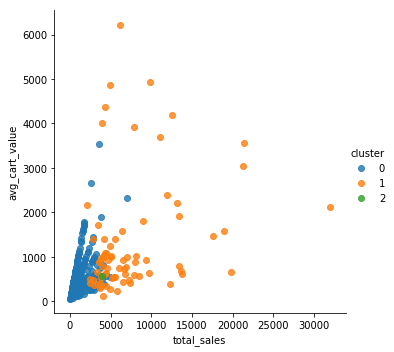

In [66]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=pca_df, fit_reg=False)

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="comparison"></span>
# 5. Model comparison

Each of those 3 dataframes have the same indices:

In [47]:
# Check all indices are identical
print(all(base_df.index == threshold_df.index))
print(all(base_df.index == pca_df.index))

True
True


**Let's import the adjusted Rand index from Scikit-Learn.**

In [49]:
# Adjusted Rand index
from sklearn.metrics import adjusted_rand_score 

**We can see the adjusted Rand index between <code style="color:steelblue">base_df.cluster</code> and <code style="color:steelblue">threshold_df.cluster</code> like so:**

In [58]:
# Similary between base_df.cluster and threshold_df.cluster
adjusted_rand_score(base_df.cluster, threshold_df.cluster)

0.6021354951782343

Furthermore, the adjusted Rand index is **symmetric**, which means you can pass in the clusters in any order.

In [61]:
# Similary between threshold_df.cluster and base_df.cluster
adjusted_rand_score(threshold_df.cluster, base_df.cluster)

0.6021354951782343

**Finally, display the adjusted Rand index between <code style="color:steelblue">base_df.cluster</code> and <code style="color:steelblue">pca_df.cluster</code>.**
* Is it higher or lower than the one between <code style="color:steelblue">base_df.cluster</code> and <code style="color:steelblue">threshold_df.cluster</code>?
* Which clusters are more like the ones created from the the base dataframe?

In [69]:
# Similary between base_df.cluster and pca_df.cluster
adjusted_rand_score(base_df.cluster, pca_df.cluster)

0.7671976569751683

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<br>
## Next Steps

Congratulations for making it through Project 4's Cluster Analysis!

As a reminder, here are a few things you did in this module:
* You brought together all of the customer-level features you've created in this project.
* You learned the inuitition behind the K-Means algorithm.
* You applied the K-Means algorithm to 3 different feature sets.
* And you compared the consensus (or lack thereof) of the clusters created.

This marks the end of Project 4!

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>